In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('AB_NYC_2019.csv')

In [7]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [9]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [26]:
clean_df = df.drop(columns = ['latitude' , 'longitude','last_review', 'reviews_per_month'])

In [23]:
df[df['availability_365'] == 365]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,365
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,NaN,1,365
97,21644,"Upper Manhattan, New York",82685,Elliott,Manhattan,Harlem,40.82803,-73.94731,Private room,89,1,1,2018-10-09,0.11,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48744,36415840,A BEAUTIFUL SPACE IN HEART OF WILLIAMSBURG,223715460,Simon And Julian,Brooklyn,Williamsburg,40.71091,-73.96560,Entire home/apt,499,30,0,NaN,NaN,1,365
48844,36453952,West Village Studio on quiet cobblestone street,115491896,Will,Manhattan,West Village,40.73620,-74.00827,Entire home/apt,205,1,0,NaN,NaN,1,365
48868,36473253,Heaven for you(only for guy),261338177,Diana,Brooklyn,Gravesend,40.59118,-73.97119,Shared room,25,7,0,NaN,NaN,6,365
48880,36481315,The Raccoon Artist Studio in Williamsburg New ...,208514239,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,120,1,0,NaN,NaN,3,365


In [25]:
df.sort_values('price', ascending = [False])

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9151,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0
17692,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.16,1,0
29238,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,NaN,NaN,1,83
40433,31340283,2br - The Heart of NYC: Manhattans Lower East ...,4382127,Matt,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,NaN,NaN,1,365
12342,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Amy,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,2016-01-01,0.14,1,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333


In [31]:
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [36]:
df[(df['neighbourhood_group'] == 'Manhattan') & (df['price'] == df['price'].max())]


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
29238,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,NaN,NaN,1,83


In [41]:
df['revenues'] = df['price'] * df['availability_365']


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [50]:
df[df['revenues'] == df['revenues'].max()]


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,revenues
40433,31340283,2br - The Heart of NYC: Manhattans Lower East ...,4382127,Matt,Manhattan,Lower East Side,40.7198,-73.98566,Entire home/apt,9999,30,0,NaN,NaN,1,365,3649635


In [59]:
df.sort_values('revenues', ascending=False)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,revenues
40433,31340283,2br - The Heart of NYC: Manhattans Lower East ...,4382127,Matt,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,NaN,NaN,1,365,3649635
4377,2953058,Film Location,1177497,Jessica,Brooklyn,Clinton Hill,40.69137,-73.96723,Entire home/apt,8000,1,1,2016-09-15,0.03,11,365,2920000
42523,33007610,70' Luxury MotorYacht on the Hudson,7407743,Jack,Manhattan,Battery Park City,40.71162,-74.01693,Entire home/apt,7500,1,0,NaN,NaN,1,364,2730000
44034,33998396,3000 sq ft daylight photo studio,3750764,Kevin,Manhattan,Chelsea,40.75060,-74.00388,Entire home/apt,6800,1,0,NaN,NaN,6,364,2475200
48043,36056808,Luxury TriBeCa Apartment at an amazing price,271248669,Jenny,Manhattan,Tribeca,40.71206,-74.00999,Entire home/apt,6500,180,0,NaN,NaN,1,365,2372500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18833,14936181,Apt with Modern Lights Available,11293255,Abdul Fattah,Brooklyn,Bedford-Stuyvesant,40.68789,-73.95750,Private room,215,3,3,2017-09-24,0.10,1,0,0
35154,27889231,Private Room in a Recently Remodeled Apt Bushwick,4908332,Ivan,Brooklyn,Bushwick,40.70325,-73.91349,Private room,70,1,8,2019-04-21,0.81,1,0,0
18834,14936709,Entire 1bdr Manhattan NY,55547933,KaLisa & Christian,Manhattan,Inwood,40.86040,-73.92716,Entire home/apt,85,3,4,2018-07-13,0.18,1,0,0
35152,27876980,"Private, big, clean cozy room, in TIMES SQUARE",121657084,Naor,Manhattan,Midtown,40.75710,-73.98014,Private room,95,3,28,2019-06-15,2.71,1,0,0


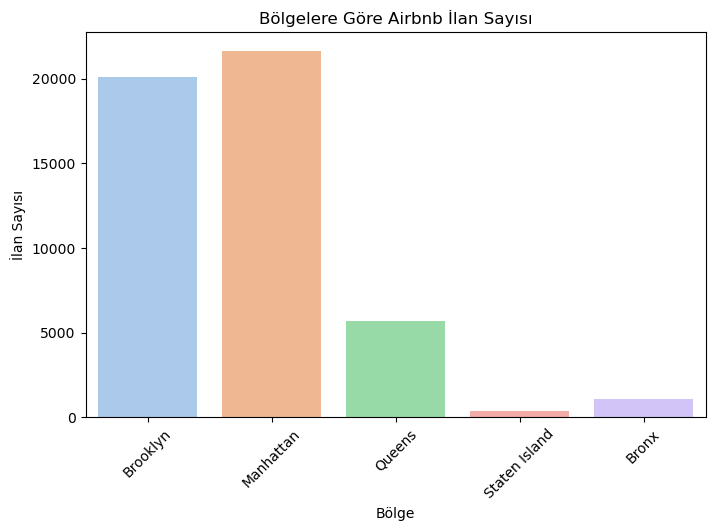

In [60]:


plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='neighbourhood_group', palette='pastel')
plt.title('Bölgelere Göre Airbnb İlan Sayısı')
plt.xlabel('Bölge')
plt.ylabel('İlan Sayısı')
plt.xticks(rotation=45)
plt.show()


(0.0, 500.0)

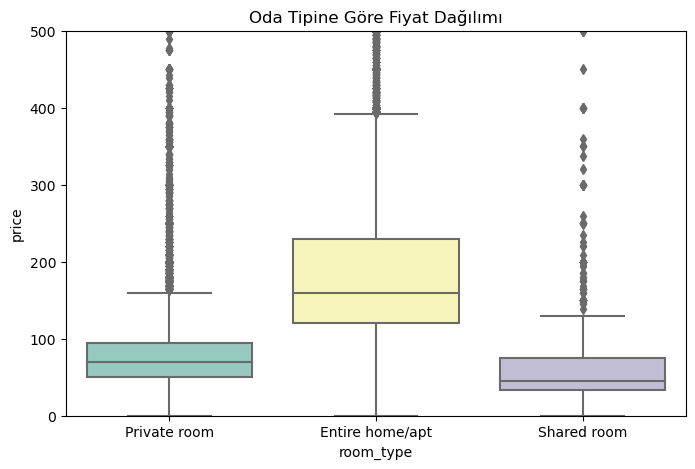

In [61]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='room_type', y='price', palette='Set3')
plt.title('Oda Tipine Göre Fiyat Dağılımı')
plt.ylim(0, 500) 


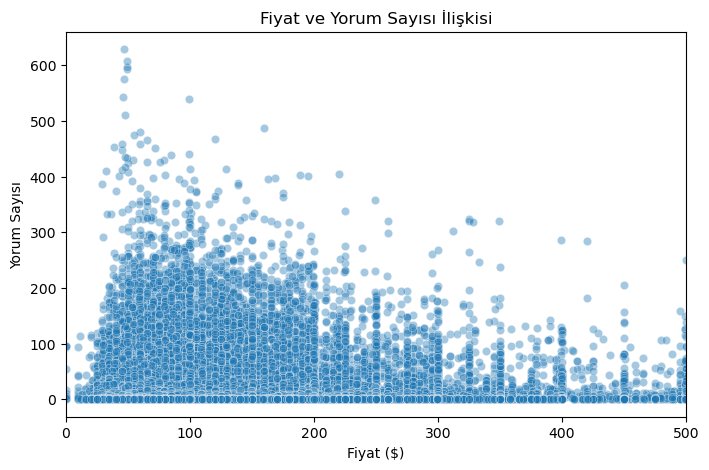

In [63]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='price', y='number_of_reviews', alpha=0.4)
plt.title('Fiyat ve Yorum Sayısı İlişkisi')
plt.xlim(0, 500)
plt.xlabel('Fiyat ($)')
plt.ylabel('Yorum Sayısı')
plt.show()


In [64]:




df_clean = df.dropna(subset=['price', 'availability_365'])


df_clean['revenues'] = df_clean['price'] * df_clean['availability_365']

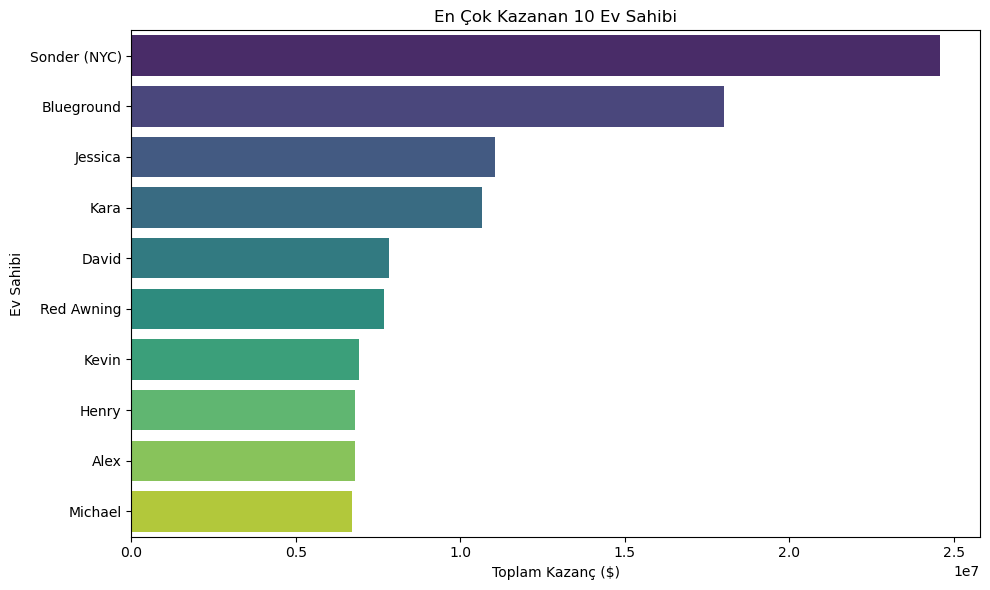

In [65]:
revenue_by_host = df_clean.groupby('host_name')['revenues'].sum().sort_values(ascending=False).head(10)


plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_by_host.values, y=revenue_by_host.index, palette="viridis")
plt.title('En Çok Kazanan 10 Ev Sahibi')
plt.xlabel('Toplam Kazanç')
plt.ylabel('Ev Sahibi')
plt.tight_layout()
plt.show()

In [72]:
konum_kira = df_clean.groupby('neighbourhood_group')['revenues'].mean()

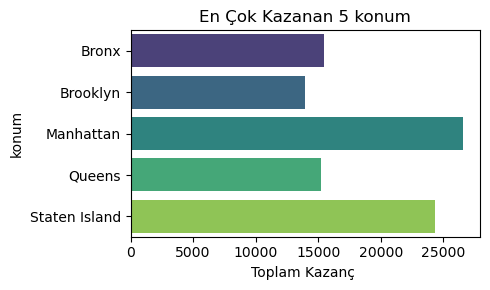

In [75]:
plt.figure(figsize = (5,3))
sns.barplot(x=konum_kira.values, y=konum_kira.index, palette="viridis")
plt.title('En Çok Kazanan 5 konum')
plt.xlabel('Toplam Kazanç ')
plt.ylabel('konum')
plt.tight_layout()
plt.show()